In [219]:
import os
import pandas as pd
import datetime
import numpy as np

import seaborn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [220]:
df = pd.read_csv("velib_data/velib_73.csv", sep=";", encoding="utf-8", index_col=0)
nb_of_updates = 288
df.head()

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,...,last_update_584,available_bikes_584,last_update_585,available_bikes_585,last_update_586,available_bikes_586,last_update_587,available_bikes_587,last_update_588,available_bikes_588
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,36,14,True,50,True,Paris,1501844269000,31705 - CHAMPEAUX (BAGNOLET),31705,...,1502194909000,5,1502195677000,4,1502195681000,5,1502196286000,5,1502196890000,5
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,6,27,True,33,False,Paris,1501844370000,10042 - POISSONNIÈRE - ENGHIEN,10042,...,1502194489000,15,1502195092000,15,1502195697000,15,1502196795000,15,1502197024000,16
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,38,6,True,44,True,Paris,1501843973000,08020 - METRO ROME,8020,...,1502194921000,13,1502195524000,13,1502196128000,13,1502196731000,13,1502197346000,12
3,37 RUE CASANOVA - 75001 PARIS,0,37,True,37,False,Paris,1501844241000,01022 - RUE DE LA PAIX,1022,...,1502194907000,11,1502195600000,10,1502196205000,9,1502196807000,10,1502197422000,10
4,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,1,17,True,25,False,Paris,1501843775000,35014 - DE GAULLE (PANTIN),35014,...,1502194690000,17,1502195294000,17,1502195898000,17,1502196502000,17,1502197106000,17


In [221]:
# Convert timestamp to dates
df["last_update"] = df["last_update"].apply(lambda x: datetime.datetime.utcfromtimestamp(x/1000))
for i in range(1, nb_of_updates):
    df["last_update_{}".format(i)] = df["last_update_{}".format(i)].apply(lambda x: datetime.datetime.utcfromtimestamp(x/1000))

In [222]:
df

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,...,last_update_584,available_bikes_584,last_update_585,available_bikes_585,last_update_586,available_bikes_586,last_update_587,available_bikes_587,last_update_588,available_bikes_588
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,36,14,True,50,True,Paris,2017-08-04 10:57:49,31705 - CHAMPEAUX (BAGNOLET),31705,...,1502194909000,5,1502195677000,4,1502195681000,5,1502196286000,5,1502196890000,5
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,6,27,True,33,False,Paris,2017-08-04 10:59:30,10042 - POISSONNIÈRE - ENGHIEN,10042,...,1502194489000,15,1502195092000,15,1502195697000,15,1502196795000,15,1502197024000,16
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,38,6,True,44,True,Paris,2017-08-04 10:52:53,08020 - METRO ROME,8020,...,1502194921000,13,1502195524000,13,1502196128000,13,1502196731000,13,1502197346000,12
3,37 RUE CASANOVA - 75001 PARIS,0,37,True,37,False,Paris,2017-08-04 10:57:21,01022 - RUE DE LA PAIX,1022,...,1502194907000,11,1502195600000,10,1502196205000,9,1502196807000,10,1502197422000,10
4,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,1,17,True,25,False,Paris,2017-08-04 10:49:35,35014 - DE GAULLE (PANTIN),35014,...,1502194690000,17,1502195294000,17,1502195898000,17,1502196502000,17,1502197106000,17
5,57 & 36 RUE JULIEN LACROIX - 75020 PARIS,26,0,True,26,False,Paris,2017-08-04 10:52:48,20040 - PARC DE BELLEVILLE,20040,...,1502194878000,0,1502195482000,0,1502196087000,0,1502196692000,0,1502197297000,0
6,BOULEVARD ALEXANDRE SOLJENITSYNE - 92800 PUTEAUX,8,52,True,60,False,Paris,2017-08-04 10:51:13,28002 - SOLJENITSYNE (PUTEAUX),28002,...,1502195016000,22,1502195622000,21,1502196226000,21,1502196841000,21,1502197448000,21
7,48 RUE OLIVIER DE SERRES - 75015 PARIS,21,3,True,24,False,Paris,2017-08-04 10:49:57,15111 - SERRES,15111,...,1502195016000,2,1502195619000,2,1502196223000,2,1502196329000,3,1502197417000,3
8,ROUTE DE L'ARTILLERIE - 75012 PARIS,0,0,True,55,False,Paris,2017-08-04 10:53:11,12124 - PYRAMIDE ARTILLERIE,12124,...,1502194853000,0,1502195457000,0,1502196060000,0,1502196664000,0,1502197268000,0
9,56 RUE SAINT GEORGES - 75009 PARIS,17,5,True,22,False,Paris,2017-08-04 10:51:32,09021 - SAINT GEORGES,9021,...,1502194791000,11,1502195396000,11,1502195761000,12,1502196365000,12,1502196970000,12


In [223]:
x = np.array([df["last_update_{}".format(i)][12] for i in range(1, nb_of_updates)])
y = np.array([df["available_bikes_{}".format(i)][12] for i in range(1, nb_of_updates)])

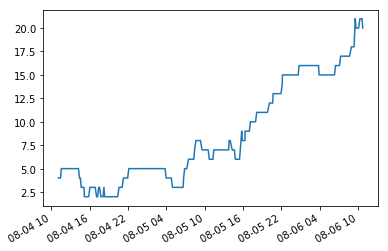

In [224]:
plt.plot(x, y)
plt.gcf().autofmt_xdate()

In [258]:
first = df.loc[df['name']=="06020 - SAINT MICHEL DANTON"]
second = df.loc[df['name']=="05033 - SAINT SEVERIN"]
third = df.loc[df['name']=="05001 - SAINT GERMAIN HARPE"]
fourth = df.loc[df['name']=="06016 - DANTON"]

In [259]:
first_x = np.array([first["last_update_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])
first_y = np.array([first["available_bikes_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])

In [260]:
second_x = np.array([second["last_update_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])
second_y = np.array([second["available_bikes_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])

In [261]:
third_x = np.array([third["last_update_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])
third_y = np.array([third["available_bikes_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])

In [262]:
fourth_x = np.array([fourth["last_update_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])
fourth_y = np.array([fourth["available_bikes_{}".format(i)].iloc[0] for i in range(1, nb_of_updates) if i%6==0])

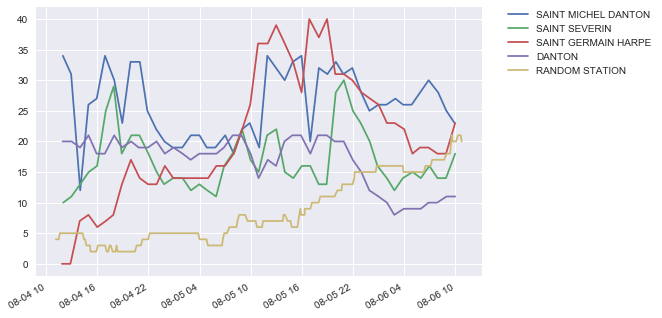

In [263]:
from scipy.interpolate import spline

plt.plot(first_x, first_y, label="SAINT MICHEL DANTON")

plt.plot(second_x, second_y, label="SAINT SEVERIN")

plt.plot(third_x, third_y, label= "SAINT GERMAIN HARPE")

plt.plot(fourth_x, fourth_y, label= "DANTON")

plt.plot(x,y, label='RANDOM STATION')

plt.gcf().autofmt_xdate()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('test.jpg', dpi=500, bbox_inches='tight')
plt.show()